In [12]:
import pandas as pd
import numpy as np
import os

### Import data

In [13]:
data_path  = os.path.join(os.path.pardir,'data', 'raw')
train_path = os.path.join(data_path, 'train.csv')
test_path = os.path.join(data_path, 'test.csv')

In [14]:
train_df = pd.read_csv(train_path, index_col = 'PassengerId')
test_df = pd.read_csv(test_path, index_col = 'PassengerId')

In [15]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


### Basic Structure

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [18]:
# Add column as Survived in test df with default value -888 no mean
test_df['Survived']= -888

In [19]:
# concat the 2 dfs as df
df = pd.concat((train_df, test_df), axis =0)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [21]:
 df.tail(4)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-888,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-888,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-888,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-888,2668


In [23]:
df.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [24]:
df['Name'].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

In [26]:
df[['Name', 'Age']].head()

,Name,Age
PassengerId,,
1,"Braund, Mr. Owen Harris",22.0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0
3,"Heikkinen, Miss. Laina",26.0
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0
5,"Allen, Mr. William Henry",35.0


In [27]:
df.loc[3:7]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463


In [28]:
df.loc[5:7,'Age': 'Fare']

,Age,Cabin,Embarked,Fare
PassengerId,,,,
5,35.0,NaN,S,8.0500
6,NaN,NaN,Q,8.4583
7,54.0,E46,S,51.8625


In [31]:
df.loc[5:7,['Age', 'Fare', 'Embarkment']]

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,Age,Fare,Embarkment
PassengerId,,,
5,35.0,8.0500,NaN
6,NaN,8.4583,NaN
7,54.0,51.8625,NaN


,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
6,8.4583,"Moran, Mr. James",0,3,male
7,51.8625,"McCarthy, Mr. Timothy J",0,1,male


In [35]:
# Filter male in new df
male_1stClass = df.loc[((df.Sex =='male') &(df.Pclass == 1)), :]
male_1stClass.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
7,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,1,male,0,0,17463
24,28.0,A6,S,35.5000,"Sloper, Mr. William Thompson",0,1,male,0,1,113788


In [36]:
# how many men in 1st calss?
print('Number of male in 1st class: {0}'.format(len(male_1stClass)))


Number of male in 1st class: 179


In [38]:
#Filter all male
male = df.loc[(df.Sex =='male'),:]

In [39]:
male.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.25,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
5,35.0,NaN,S,8.05,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [40]:
print ('Total number of male in the titanic: {0}'.format(len(male)))

Total number of male in the titanic: 843


### Summary Stats

In [41]:
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-283.301757
std,14.413493,51.758668,0.865560,0.837836,1.041658,414.337413
min,0.170000,0.000000,0.000000,1.000000,0.000000,-888.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-888.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [42]:
# Calculate
print('Min fare: {0}'.format(df.Fare.min()))
print('Max fare: {0}'.format(df.Fare.max()))
print('Min range: {0}'.format(df.Fare.max() - df.Fare.min()))
print('25 percentile: {0}'.format(df.Fare.quantile(.25)))
print('50 percentile: {0}'.format(df.Fare.quantile(.50)))
print('75 percentile: {0}'.format(df.Fare.quantile(.75)))
print('Variance fare: {0}'.format(df.Fare.var()))
print('Std dev fare: {0}'.format(df.Fare.std()))


Min fare: 0.0
Max fare: 512.3292
Min range: 512.3292
25 percentile: 7.8958
50 percentile: 14.4542
75 percentile: 31.275
Variance fare: 2678.959737892894
Std dev fare: 51.75866823917414


In [47]:
 %matplotlib inline

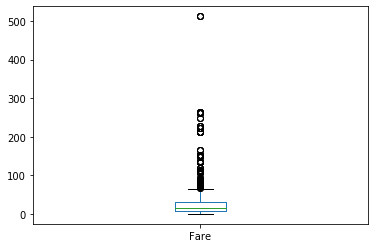

In [50]:
df.Fare.plot(kind='box');

In [51]:
df.describe(include = 'all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-283.301757,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,414.337413,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-888.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-888.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [52]:
 df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [54]:
   df.Sex.value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [56]:
df[df.Survived != -888].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [57]:
df[df.Survived != -888].Survived.value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [58]:
 df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [59]:
 df.Pclass.value_counts(normalize = True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

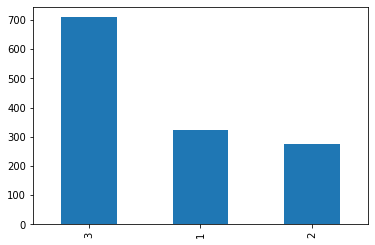

In [62]:
df.Pclass.value_counts().plot(kind = 'bar');

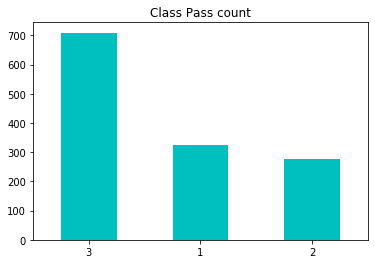

In [64]:
df.Pclass.value_counts().plot(kind = 'bar', rot  = 0, title = 'Class Pass count', color = 'c');

### Distributions

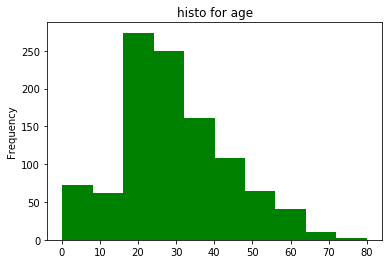

In [66]:
df.Age.plot(kind = 'hist', title = 'histo for age', color = 'g');

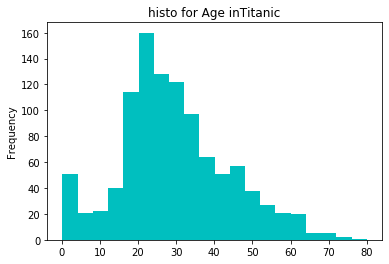

In [69]:
df.Age.plot(kind = 'hist', title = 'histo for Age inTitanic', color ='c', bins =20);

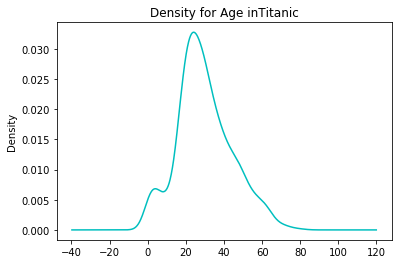

In [72]:
df.Age.plot(kind = 'kde', title = 'Density for Age inTitanic', color ='c');

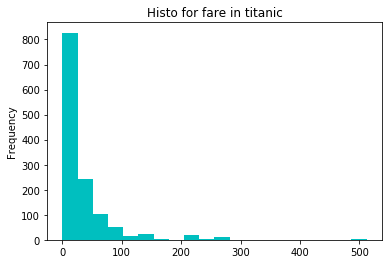

In [73]:
df.Fare.plot(kind = 'hist', title = 'Histo for fare in titanic', color = 'c', bins = 20);

In [77]:
print ('skewness for age: {0}'.format(df.Age.skew()))
print ('skeness for fare: {0}'.format(df.Fare.skew()))    

skewness for age: 0.40767455974362266
skeness for fare: 4.367709134122922


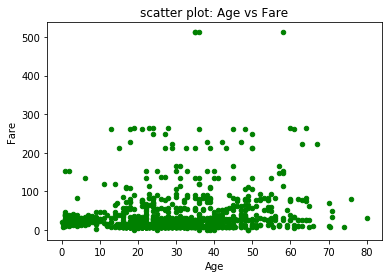

In [78]:
df.plot.scatter(x = 'Age', y = 'Fare', color = 'g', title ='scatter plot: Age vs Fare');

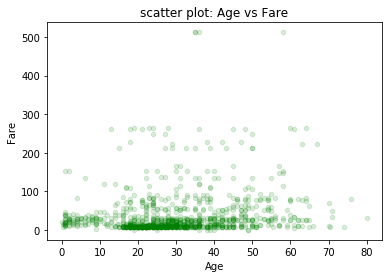

In [85]:
df.plot.scatter(x = 'Age', y = 'Fare', color = 'g', title ='scatter plot: Age vs Fare', alpha = 0.15);

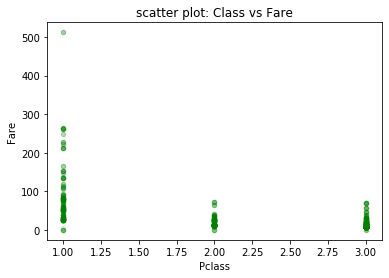

In [89]:
df.plot.scatter(x = 'Pclass', y = 'Fare', color = 'g', title ='scatter plot: Class vs Fare', alpha = 0.1);

### Grouping and Aggregation

In [92]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [94]:
df.groupby(['Pclass']).Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [103]:
df.groupby(['Pclass']).Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [102]:
df.groupby(['Pclass']).Fare.max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

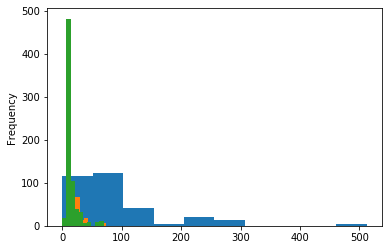

In [99]:
df.groupby(['Pclass']).Fare.plot(kind='hist')

In [104]:
df.groupby(['Pclass']).Age.median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [105]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


Pclass
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

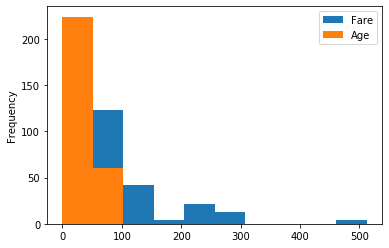

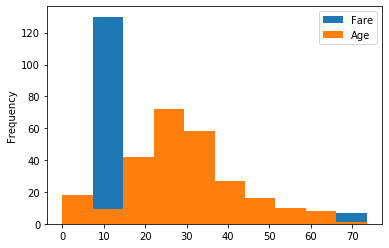

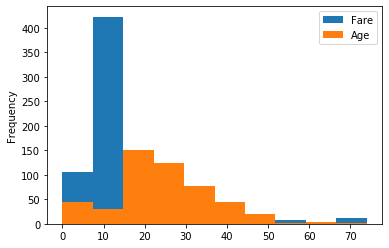

In [106]:
df.groupby(['Pclass'])['Fare', 'Age'].plot(kind='hist')

In [110]:
df.groupby(['Pclass'])['Fare', 'Age'].median()

,Fare,Age
Pclass,,
1,60.0000,39.0
2,15.0458,29.0
3,8.0500,24.0


In [109]:
df.groupby(['Pclass'])['Fare', 'Age'].mean()

,Fare,Age
Pclass,,
1,87.508992,39.159930
2,21.179196,29.506705
3,13.302889,24.816367


In [108]:
df.groupby(['Pclass']).agg({'Fare': 'mean', 'Age': 'median'})

,Fare,Age
Pclass,,
1,87.508992,39.0
2,21.179196,29.0
3,13.302889,24.0


In [118]:
aggregations = {
    'Fare': {
        'Fare_mean': 'mean',
        'Fare_median': 'median',
        'Fare_max': max,
        'Fare_min': np.min
    },
    'Age': {
        'Age_mean': 'mean',
        'Age_median': 'median',
        'Age_max': max,
        'Age_min': np.min
    }
}

In [119]:
df.groupby(['Pclass']).agg(aggregations)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age             \
        Fare_mean Fare_median  Fare_max Fare_min   Age_mean Age_median   
Pclass                                                                   
1       87.508992     60.0000  512.3292      0.0  39.159930       39.0   
2       21.179196     15.0458   73.5000      0.0  29.506705       29.0   
3       13.302889      8.0500   69.5500      0.0  24.816367       24.0   

                        
       Age_max Age_min  
Pclass                  
1         80.0    0.92  
2         70.0    0.67  
3         74.0    0.17

In [129]:
df.groupby(['Pclass','Embarked']).agg(aggregations)

/Users/riccardoanacar/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                                       Age  \
                  Fare_mean Fare_median  Fare_max Fare_min   Age_mean   
Pclass Embarked                                                         
1      C         106.845330     76.7292  512.3292  25.7417  39.062500   
       Q          90.000000     90.0000   90.0000  90.0000  38.000000   
       S          72.148094     52.0000  263.0000   0.0000  39.121987   
2      C          23.300593     15.3146   41.5792  12.0000  23.645833   
       Q          11.735114     12.3500   12.3500   9.6875  49.000000   
       S          21.206921     15.3750   73.5000   0.0000  29.692888   
3      C          11.021624      7.8958   22.3583   4.0125  21.448667   
       Q          10.390820      7.7500   29.1250   6.7500  25.535714   
       S          14.435422      8.0500   69.5500   0.0000  25.247068   

                                            
                Age_median Age_max Age_min  
Pclass Embarked                             
1      C              39.0    71.0    6.00  
       Q              37.0    44.0   33.00  
       S              39.0    80.0    0.92  
2      C              26.0    41.0    1.00  
       Q              57.0    62.0   30.00  
       S              29.0    70.0    0.67  
3      C              20.5    45.5    0.42  
       Q              24.0    70.5    2.00  
       S              24.0    74.0    0.17

In [128]:
df.groupby (['Pclass', 'Embarked'])['Fare', 'Age'].median()

Fare   Age
Pclass Embarked               
1      C         76.7292  39.0
       Q         90.0000  37.0
       S         52.0000  39.0
2      C         15.3146  26.0
       Q         12.3500  57.0
       S         15.3750  29.0
3      C          7.8958  20.5
       Q          7.7500  24.0
       S          8.0500  24.0

### Crosstab

In [133]:
pd.crosstab(df.Sex, df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


In [134]:
pd.crosstab(df.Pclass, df.Sex)

Sex,female,male
Pclass,,
1,144,179
2,106,171
3,216,493


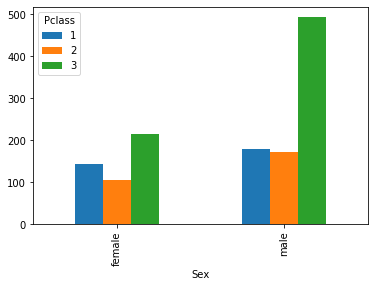

In [135]:
pd.crosstab(df.Sex, df.Pclass).p lot(kind = 'bar');

### Pivot

In [136]:
df.pivot_table(index='Sex', columns = 'Pclass', values = 'Age', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


In [137]:
df.pivot_table(index='Sex', columns = 'Pclass', values = 'Fare', aggfunc='mean')


Pclass,1,2,3
Sex,,,
female,109.412385,23.234827,15.324250
male,69.888385,19.904946,12.415462


In [138]:
 df.groupby(['Sex', 'Pclass']).Age.mean()

Sex     Pclass
female  1         37.037594
        2         27.499223
        3         22.185329
male    1         41.029272
        2         30.815380
        3         25.962264
Name: Age, dtype: float64

In [141]:
df.groupby(['Sex', 'Pclass']).A ge.mean().unstack()

Pclass,1,2,3
Sex,,,
female,37.037594,27.499223,22.185329
male,41.029272,30.815380,25.962264


### Missing Values

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


 #### Embarked \

In [144]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [145]:
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [146]:
# crosstab to check wehre emb most survived, 
# but we need to exclude -888
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked)


Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [149]:
df.groupby(['Embarked'])['Survived'].value_counts(normalize = True)

Embarked  Survived
C         -888        0.377778
           1          0.344444
           0          0.277778
Q          0          0.382114
          -888        0.373984
           1          0.243902
S          0          0.467177
          -888        0.295405
           1          0.237418
Name: Survived, dtype: float64

In [ ]:
# REplace the missing value swith S
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplace = True)

In [152]:
# more analysis, the 2 pass have fare of 80
df.groupby(['Pclass', 'Embarked']).Fare.median()


Pclass  Embarked
1       C           76.7292
        Q           90.0000
        S           52.0000
2       C           15.3146
        Q           12.3500
        S           15.3750
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [153]:
# This shows Emb C as closer to 80
df.Embarked.fillna('C', inplace  = True)

In [155]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


## Fare

In [157]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [159]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)


8.05


In [160]:
df.Fare.fillna(median_fare, inplace = True)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


### Age

In [167]:
pd.options.display.max_rows =10

In [168]:
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


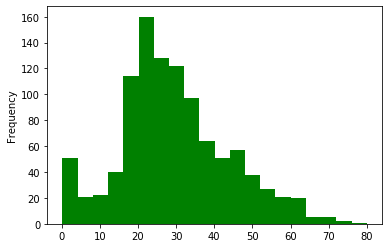

In [169]:
df.Age.plot(kind = 'hist', bins = 20, color = 'g')

In [170]:
df.Age.mean()

29.881137667304014

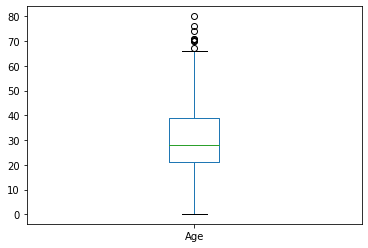

In [172]:
df.Age.plot(kind='box');

###### Few outliers, we look diff way to 

#### Replace with median by gender

In [176]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

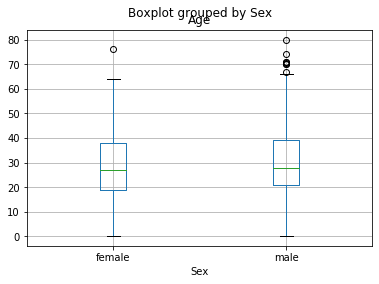

In [174]:
df[df.Age.notnull()].boxplot('Age', 'Sex')

#### Replacw by Age & Class median

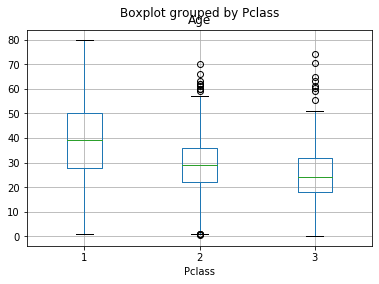

In [180]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

#### Replace with median of Age Title

In [181]:
 df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [183]:
## Function to get title of passange
def GetTitle(name):
    first_name_title = name.split(',')[1]
    title = first_name_title.split('.')[0]
    title = title.strip().lower()
    return title

In [186]:
df.Name.map(lambda x: GetTitle(x))

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [189]:
list(df.Name.map(lambda x: GetTitle(x)).unique())

['mr',
 'mrs',
 'miss',
 'master',
 'don',
 'rev',
 'dr',
 'mme',
 'ms',
 'major',
 'lady',
 'sir',
 'mlle',
 'col',
 'capt',
 'the countess',
 'jonkheer',
 'dona']

In [192]:
def GetTitle(name):
    title_group = {
        'mr':'Mr',
        'mrs':'Mrs',
        'miss':'Miss',
        'master':'Master',
        'don':'Sir',
        'rev':'Sir',
        'dr':'Officer',
        'mme':'Mrs',
        'ms':'Mrs',
        'major':'Officer',
        'lady':'Lady',
        'sir':'Sir',
        'mlle':'Miss',
        'col':'Officer',
        'capt':'Officer',
        'the countess':'Lady',
        'jonkheer':'Sir',
        'dona': 'Lady'
    }
    first_name_title = name.split(',')[1]
    title = first_name_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [195]:
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [196]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


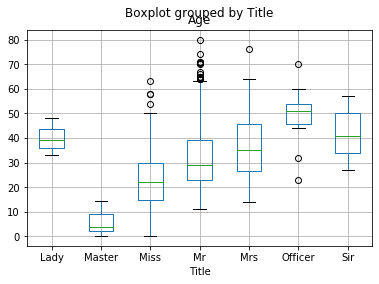

In [197]:
df[df.Age.notnull()].boxplot('Age','Title')

In [198]:
title_age_med = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_med, inplace = True)

In [202]:
title_age_med.unique()

array([29., 35., 22.,  4., 41., 51., 39.])

In [201]:
df.Age.head(7)

PassengerId
1    22.0
2    38.0
3    26.0
4    35.0
5    35.0
6    29.0
7    54.0
Name: Age, dtype: float64

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


### Outliers

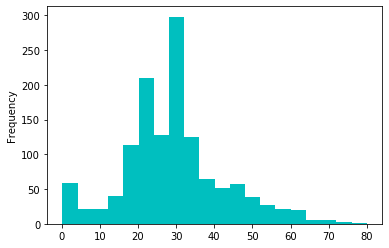

In [205]:
df.Age.plot(kind='hist', bins = 20, color ='c');

In [206]:
df.loc[df.Age>70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


### Fare

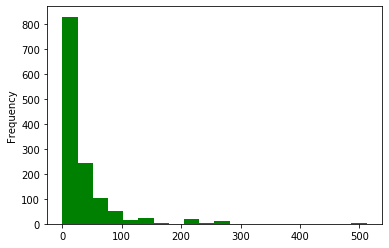

In [207]:
df.Fare.plot(kind='hist', bins = 20, color = 'g')

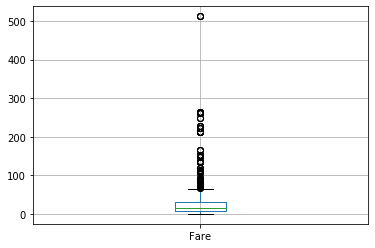

In [208]:
 df.boxplot('Fare')

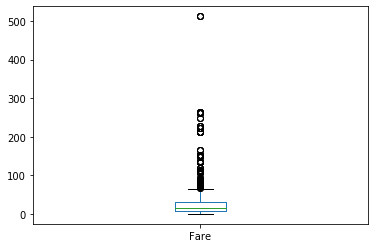

In [210]:
df.Fare.plot(kind = 'box')

In [212]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [214]:
## We can tranform these outliers with log for example
LogFare = np.log(df.Fare +1)

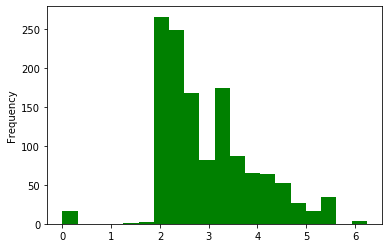

In [216]:
LogFare.plot(kind='hist', bins = 20, color = 'g')

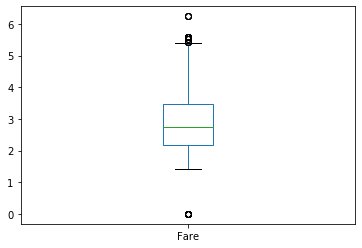

In [215]:
LogFare.plot(kind = 'box')

In [218]:
# binnig
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [220]:
# leble the bin
pd.qcut(df.Fare, 4, labels =['ver_low', 'low', 'high', 'very_high'] )


PassengerId
1         ver_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307      ver_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [ver_low < low < high < very_high]

In [221]:
pd.qcut(df.Fare, 4, labels =['ver_low', 'low', 'high', 'very_high']).value_counts()


ver_low      337
high         328
very_high    323
low          321
Name: Fare, dtype: int64

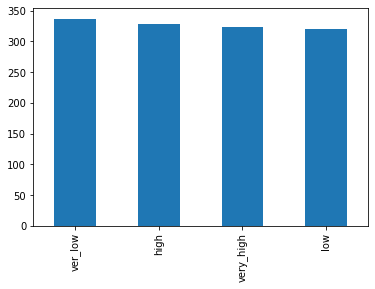

In [222]:
pd.qcut(df.Fare, 4, labels =['ver_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar')


In [223]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels =['ver_low', 'low', 'high', 'very_high'])


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 174.4+ KB


### Data engineering

In [225]:
# Age state
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [226]:
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [229]:
pd.crosstab(df[df.Survived !=-888].Survived , df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


### Family size

In [238]:
df['FamilySize'] = df.Parch + df.SibSp +1

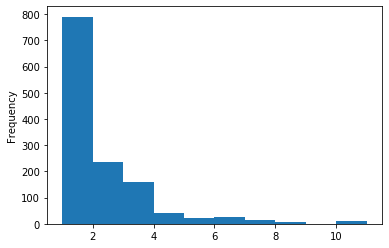

In [239]:
df['FamilySize'].plot(kind = 'hist')

In [243]:
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_high,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_high,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_high,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_high,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_high,Adult,11


In [244]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


### IsMother

In [245]:
df['IsMother'] = np.where(((df.Sex == 'female') & (df.Parch >0) & (df.Age >18) & (df.Title != 'Miss')), 1,0)

In [247]:
pd.crosstab(df [df.Survived != -888].Survived, df[df.Survived!=-888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


### Deck

In [248]:
df.Cabin

PassengerId
1        NaN
2        C85
3        NaN
4       C123
5        NaN
        ... 
1305     NaN
1306    C105
1307     NaN
1308     NaN
1309     NaN
Name: Cabin, Length: 1309, dtype: object

In [249]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [250]:
df.loc[df.Cabin =='T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [252]:
df.loc[df.Cabin == 'T'] = np.NaN

In [253]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [254]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')
df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [256]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [257]:
pd.crosstab(df[df.Survived!= -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0.0,8,12,24,8,8,5,2,481
1.0,7,35,35,25,24,8,2,206


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1308 non-null float64
Cabin         294 non-null object
Embarked      1308 non-null object
Fare          1308 non-null float64
Name          1308 non-null object
Parch         1308 non-null float64
Pclass        1308 non-null float64
Sex           1308 non-null object
SibSp         1308 non-null float64
Survived      1308 non-null float64
Ticket        1308 non-null object
Title         1308 non-null object
Fare_Bin      1308 non-null category
AgeState      1308 non-null object
FamilySize    1308 non-null float64
IsMother      1308 non-null float64
Deck          1309 non-null object
dtypes: category(1), float64(8), object(8)
memory usage: 215.3+ KB
